# CDIPpy Example - XYZ Displacements Plot
The following example runs an application of the [CDIPpy](https://cdipsw.github.io/CDIPpy/quickstart/) python library to create subplots of: North/South Displacement (X), East/West Displacement (Y) and Vertical Displacement (Z).  Code utilizes CDIPPY get_xyz() function to call get_series with vrs set to xyz variables.

1) read in CDIP station metadata,
2) access wave data for time period of interest,
3) plot timeseries,

See https://cdip.ucsd.edu/themes/cdip?d2=p70&u2=s:067:v:xz_plot:dt:200805210900 for example Timeseries plot

## Import Libraries

Start by importing the necessary python packages and CDIPPY module

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpldts
import datetime
import time
import calendar

# CDIP imports
import cdippy
from cdippy.stndata import StnData

## Initialize CDIPpy input parameters
* Supply CDIP station id
* Start date (YYYYMMDDHH)
* End date
* Station parameters

In [9]:
##- Initialize station id, start/end date, and parameters
##- Only select 60 minutes of data to view
stn = '067'
sdate = '20250401040000'
edate = '20250401043000'
params = ['waveHs','waveTp','waveDp']

## Data Access

* Use cdippy.stndata function StnData(stn)
* Returns StnData object
* Access station metadata about individual stations deployments

In [10]:
##- Get Station Dataset object
stn_data = cdippy.stndata.StnData(stn)

##- Get metadata (i.e. information about individual deployments)
meta = stn_data.get_stn_meta()
stn_name = meta['metaStationName']
print(stn_name)

SAN NICOLAS ISLAND, CA BUOY - 067p1


### Grab data using 'get_xyz' function
Will return a dictionary of arrays for each xyz parameter as keys.  Automatically returns a dictionary of the following parameters:
dict_keys(['xyzZDisplacement', 'xyzTime', 'xyzXDisplacement', 'xyzYDisplacement'])

stn_data.get_xyz(start, end)
* start: start datetime (datetime obj)
* end: end datetime (datetime obj)

In [21]:
##- Use CDIPPY to convert input start/end date strings to datetime objects
start = cdippy.utils.cdip_datetime(sdate)
end = cdippy.utils.cdip_datetime(edate)

##- Grab data using 'get_series' function
data = stn_data.get_xyz(start,end)
data['xyzXDisplacement'].data

array([-0.12, -0.39, -0.24, ..., -0.09, -0.31, -0.57],
      shape=(2304,), dtype=float32)

## Convert waveTimes to Datetime object

In [27]:
## Convert wave times to datetime objects (currently integers)
##- Convert times to datetime objects
wT = [cdippy.utils.timestamp_to_datetime(x) for x in data['xyzTime']]

## Create a Pandas Dataframe indexed by time

In [38]:
## Create pandas dataframe from data
df = pd.DataFrame({'xyztime': wT, 'X': data['xyzXDisplacement'].data,'Y':data['xyzYDisplacement'].data, 'Z':data['xyzZDisplacement'].data})
#df.set_index('xyztime', inplace=True)
df.head()
df['xyztime']

0      2025-04-01 04:00:00.247237
1      2025-04-01 04:00:01.028487
2      2025-04-01 04:00:01.809737
3      2025-04-01 04:00:02.590987
4      2025-04-01 04:00:03.372237
                  ...            
2299   2025-04-01 04:29:56.341027
2300   2025-04-01 04:29:57.122277
2301   2025-04-01 04:29:57.903528
2302   2025-04-01 04:29:58.684778
2303   2025-04-01 04:29:59.466028
Name: xyztime, Length: 2304, dtype: datetime64[ns]

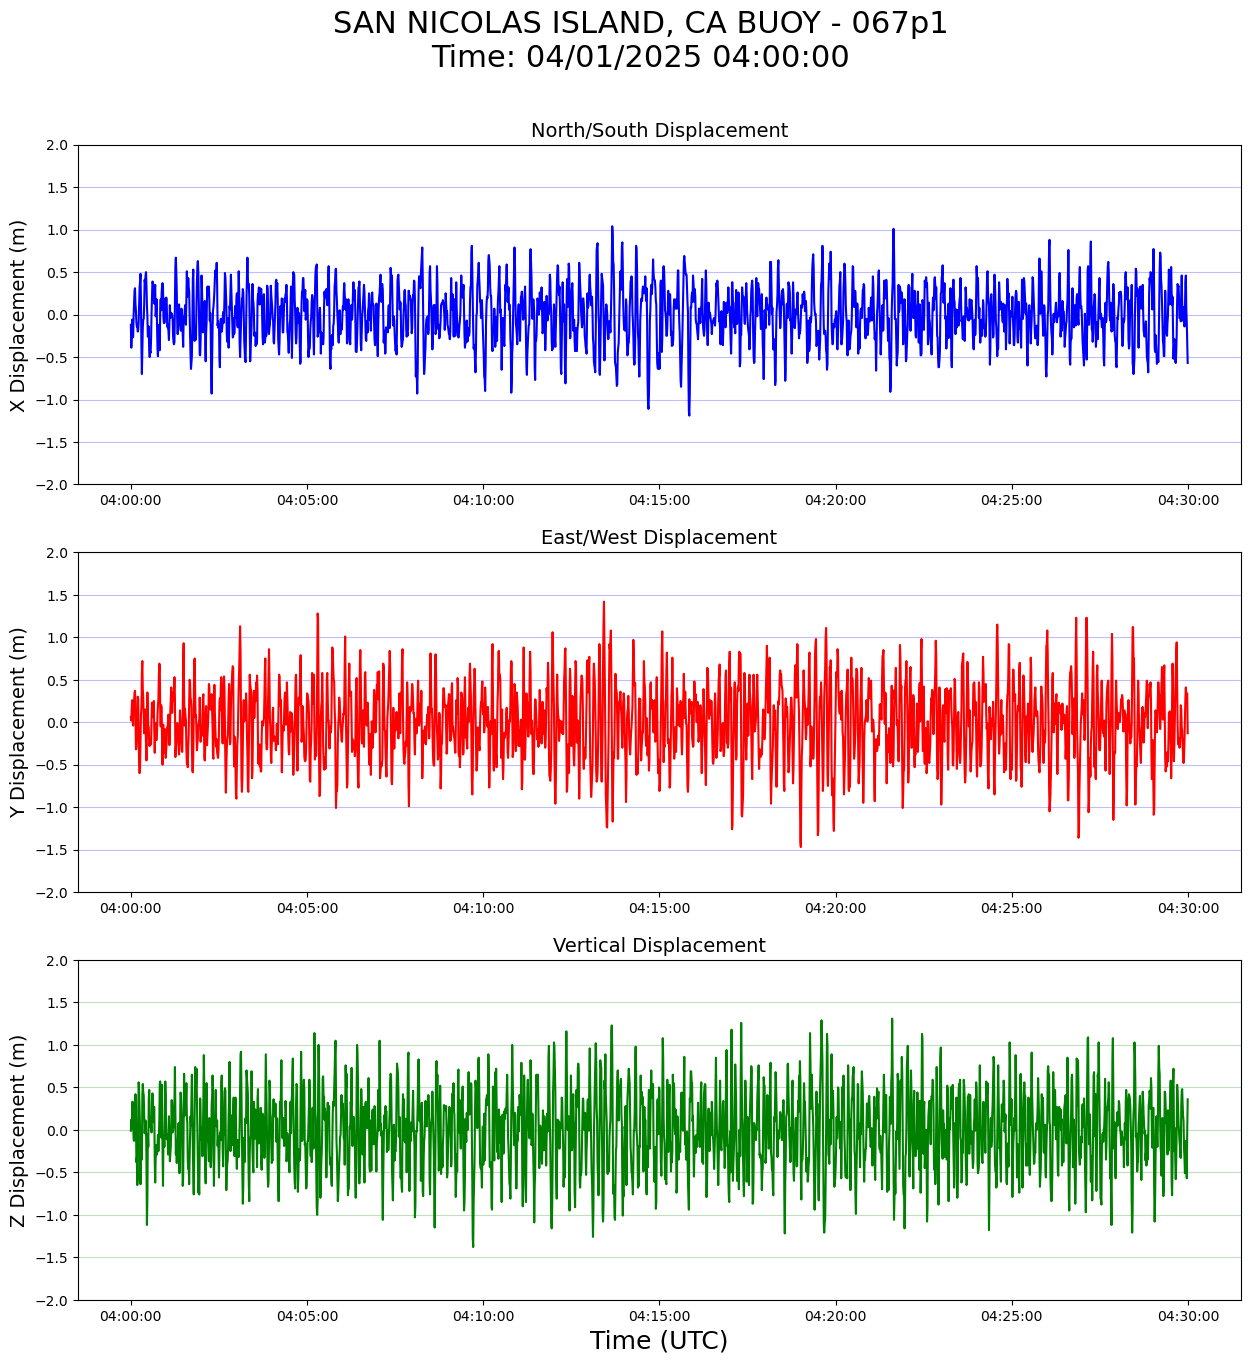

In [46]:
# Specify figure size
fig = plt.figure(figsize=(15,15))

# Limit data to date/times
x = df['X']
y = df['Y']
z = df['Z']

# Create 3 stacked subplots for three Directional Displacement Parameters (xyz)
plt_x = plt.subplot(3,1,1)
plt_x.plot(df['xyztime'],x,'b')
plt_y = plt.subplot(3,1,2, sharex=plt_x)
plt_y.plot(df['xyztime'],y,'r')
plt_z = plt.subplot(3,1,3, sharex=plt_x)
plt_z.plot(df['xyztime'],z,'g')

# Set titles
start_date = start.strftime("%m/%d/%Y %H:%M:%S")
plt.suptitle(stn_name + "\n" + "Time: " + start_date, fontsize=22, y=0.97)

# Set x-axis tick format to "HH:MM:SS" and tick interval to every 5 minutes
#days = mpldts.MinuteLocator(interval=5) 
daysFmt = mpldts.DateFormatter('%H:%M:%S')
#plt.gca().xaxis.set_major_locator(days)
plt.gca().xaxis.set_major_formatter(daysFmt)

ymin=np.floor(min(min(x), min(y), min(z)))
ymax=np.ceil(max(max(x), max(y), max(z)))

# Set y-axis limits for each plot
plt_x.set_ylim(ymin,ymax)
plt_y.set_ylim(ymin,ymax)
plt_z.set_ylim(ymin,ymax)

# Label each subplot title
plt_x.set_title('North/South Displacement', fontsize=14)
plt_y.set_title('East/West Displacement', fontsize=14)
plt_z.set_title('Vertical Displacement', fontsize=14,y=1)

# Label each y-axis
plt_x.set_ylabel('X Displacement (m)', fontsize=14)
plt_y.set_ylabel('Y Displacement (m)', fontsize=14)
plt_z.set_ylabel('Z Displacement (m)', fontsize=14)

# Label x-axis
plt.xlabel('Time (UTC)', fontsize=18)

# Plot dashed gridlines
plt_x.grid(axis='y', which='major', color='b', linestyle='-', alpha=0.25)
plt_y.grid(axis='y', which='major', color='b', linestyle='-', alpha=0.25)
plt_z.grid(axis='y', which='major', color='g', linestyle='-', alpha=0.25)